In [42]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Small Network Trial
This is a small sample I made to test the algorthm before trying on a large graph.

In [43]:
raw_trial = pd.read_csv("trial_Albright.csv")
raw_trial

,node_1,node_2
0,0,1
1,0,2
2,0,3
3,1,2
4,1,3
5,2,3
6,2,4
7,3,5
8,4,5
9,4,6


['tab:red', 'tab:blue', 'tab:blue', 'tab:red', 'tab:blue', 'tab:blue', 'tab:red', 'tab:blue']


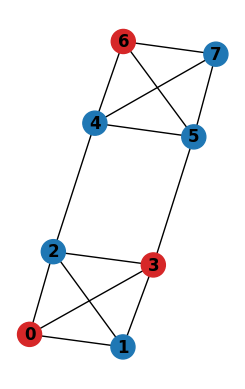

In [44]:
trial_G_raw = nx.from_pandas_edgelist(raw_trial, "node_1", "node_2")
trial_G = nx.Graph()
trial_G.add_nodes_from(sorted(trial_G_raw.nodes(data=True)))
trial_G.add_edges_from(trial_G_raw.edges(data=True))
subax1 = plt.subplot(121)
colors = ["tab:blue" if (i % 3 != 0) else "tab:red" for i in range(8)]
print(colors)
nx.draw(trial_G, node_color=colors, with_labels=True, font_weight='bold')
plt.show()

In [45]:
max(nx.edge_betweenness_centrality(trial_G))

(6, 7)

In [46]:
trial_G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [47]:
nx.edge_betweenness_centrality(trial_G)

{(0, 1): 0.03571428571428571,
 (0, 2): 0.10714285714285714,
 (0, 3): 0.10714285714285714,
 (1, 2): 0.10714285714285714,
 (1, 3): 0.10714285714285714,
 (2, 3): 0.07142857142857142,
 (2, 4): 0.2857142857142857,
 (3, 5): 0.2857142857142857,
 (4, 5): 0.07142857142857142,
 (4, 6): 0.10714285714285714,
 (4, 7): 0.10714285714285714,
 (5, 6): 0.10714285714285714,
 (5, 7): 0.10714285714285714,
 (6, 7): 0.03571428571428571}

In [48]:
max(nx.edge_betweenness_centrality(trial_G).values())

0.2857142857142857

In [49]:
from random import choice
def my_GirvanNewman_Community_Detection(input: nx.Graph) -> None:
    def max_centrality(a: nx.Graph):
        between_dict = nx.edge_betweenness_centrality(g)
        max_value = max(between_dict.values())
        possibilities = []
        for k in between_dict.keys():
            if between_dict[k] == max_value:
                possibilities.append(k)

        if len(possibilities) == 0:
            return None
        else:
            return choice(possibilities)

    print("  ---  Starting my_GirvanNewman_Community_Detection  ---  ")
    # Make a deep copy
    print("Making a deep copy...")
    g = input.__class__()
    g.add_nodes_from(input)
    g.add_edges_from(input.edges)
    total_edges = input.number_of_edges()
    print("Finished deepcopy, starting algorithm.")
    edges_removed = [None]*g.number_of_edges()
    counter = 0
    previous_splits = None
    while g.number_of_edges() > 0:
        edge = max_centrality(g)
        edges_removed[counter] = edge
        counter += 1
        g.remove_edge(edge[0], edge[1])
        #print(f"Progress: {counter}/{total_edges}", end="\r")

        cur_splits = tuple(nx.connected_components(g))
        if cur_splits != previous_splits:
            print(f"Splits: {tuple(nx.connected_components(g))}")
            previous_splits = cur_splits

        if g.number_of_edges() == 0:
            print(f"Progress: DONE              ")
    print(edges_removed)
    return None

my_GirvanNewman_Community_Detection(trial_G)

  ---  Starting my_GirvanNewman_Community_Detection  ---  
Making a deep copy...
Finished deepcopy, starting algorithm.
Splits: ({0, 1, 2, 3, 4, 5, 6, 7},)
Splits: ({0, 1, 2, 3}, {4, 5, 6, 7})
Splits: ({0, 1, 2}, {3}, {4, 5, 6, 7})
Splits: ({0, 1, 2}, {3}, {4, 5, 7}, {6})
Splits: ({0, 1}, {2}, {3}, {4, 5, 7}, {6})
Splits: ({0, 1}, {2}, {3}, {4, 7}, {5}, {6})
Splits: ({0}, {1}, {2}, {3}, {4, 7}, {5}, {6})
Splits: ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7})
Progress: DONE              
[(2, 4), (3, 5), (2, 3), (1, 3), (0, 3), (6, 7), (5, 6), (4, 6), (1, 2), (0, 2), (5, 7), (4, 5), (0, 1), (4, 7)]


In [50]:
# def my_GirvanNewman_Community_DetectionOPTIMIZED(input: nx.Graph) -> None:
#     print("  ---  Starting my_GirvanNewman_Community_Detection  ---  ")
#     # Make a deep copy
#     print("Making a deep copy...")
#     g = input.__class__()
#     g.add_nodes_from(input)
#     g.add_edges_from(input.edges)
#     total_edges = input.number_of_edges()
#     print("Finished deepcopy, starting algorithm.")
#     edges_removed = [None]*g.number_of_edges()
#     counter = 0
#     while g.number_of_edges() > 0:
#         if g.number_of_edges() > 200:
#             edges = sorted(nx.edge_betweenness_centrality(g))[:50]
#             for e in edges:
#                 edges_removed[counter] = e
#                 counter += 1
#                 g.remove_edge(e[0], e[1])
#         else:
#             edge = max(nx.edge_betweenness_centrality(g))
#             edges_removed[counter] = edge
#             counter += 1
#             g.remove_edge(edge[0], edge[1])
#         print(f"Progress: {counter}/{total_edges}", end="\r")
#         if g.number_of_edges() == 0:
#             print(f"Progress: DONE              ")
#     print(edges_removed)
#     return None

# my_GirvanNewman_Community_Detection(trial_G)

In [51]:
for c in nx.community.girvan_newman(trial_G):
    print(c)

({0, 1, 2, 3}, {4, 5, 6, 7})
({0}, {1, 2, 3}, {4, 5, 6, 7})
({0}, {1}, {2, 3}, {4, 5, 6, 7})
({0}, {1}, {2}, {3}, {4, 5, 6, 7})
({0}, {1}, {2}, {3}, {4}, {5, 6, 7})
({0}, {1}, {2}, {3}, {4}, {5}, {6, 7})
({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7})


# Lastfm_Asia Edges

In [52]:
raw_edges = pd.read_csv("lastfm_asia_edges.csv")
raw_edges

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
...,...,...
27801,7488,7564
27802,7505,7579
27803,7533,7536
27804,7569,7587


In [53]:
raw_edges.max()

node_1    7580
node_2    7623
dtype: int64

In [54]:
lastfm_asia = nx.from_pandas_edgelist(raw_edges, "node_1", "node_2")

In [55]:
#nx.draw(lastfm_asia, with_labels=False)

In [56]:
my_GirvanNewman_Community_Detection(lastfm_asia)

  ---  Starting my_GirvanNewman_Community_Detection  ---  
Making a deep copy...
Finished deepcopy, starting algorithm.
Splits: ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 

KeyboardInterrupt: 

['tab:red', 'tab:red', 'tab:blue', 'tab:red', 'tab:red', 'tab:red', 'tab:red', 'tab:red', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:red', 'tab:red', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']


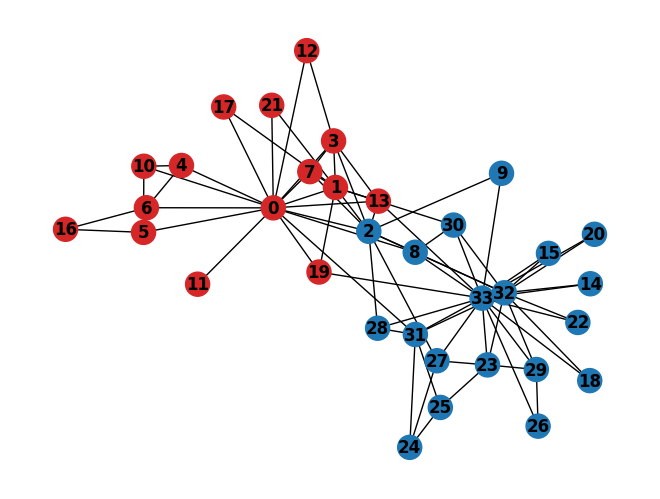

In [40]:
karate = nx.karate_club_graph()
community_1 = [16, 6, 5, 10, 4, 3, 13, 1, 0, 7, 21, 19, 17, 12, 11]
community_2 = [9, 27, 2, 28, 24, 25, 31, 26, 14, 15, 20, 8, 29, 32, 33, 23, 30, 22, 18]
colors = ["tab:blue" if (i in community_2) else "tab:red" for i in range(33+1)]
print(colors)
nx.draw(karate, node_color=colors, with_labels=True, font_weight='bold')
plt.show()

In [41]:
my_GirvanNewman_Community_Detection(karate)

  ---  Starting my_GirvanNewman_Community_Detection  ---  
Making a deep copy...
Finished deepcopy, starting algorithm.
Splits: ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},)
Splits: ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
Splits: ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
Splits: ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
Splits: ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
Splits: ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
Splits: ({0, 1, 3, 7, 12, 1

In [39]:
for c in nx.community.girvan_newman(karate):
    print(c)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25